
**МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ
ДЕРЖАВНИЙ ТОРГОВЕЛЬНО-ЕКОНОМІЧНИЙ УНІВЕРСИТЕТ
ФАКУЛЬТЕТ ІНФОРМАЦІЙНИХ ТЕХНОЛОГІЙ
КАФЕДРА КОМП'ЮТЕРНИХ НАУК
ТА ІНФОРМАЦІЙНИХ СИСТЕМ**


---



Звіт\
з лабораторної роботи №\
з дисципліни «Чисельні методи програмування»



---


Перевірила:\
ДоцентФілімонова Т.О.\
Виконав:\
Студент групи ФІТ 2-16\
Єремеєв П.Р.

Київ 2024

# **Варіант 2**

встановлення бібліотек

In [ ]:
!! pip install numdifftools

['Requirement already satisfied: numdifftools in /usr/local/lib/python3.10/dist-packages (0.9.41)',
 'Requirement already satisfied: numpy>=1.9 in /usr/local/lib/python3.10/dist-packages (from numdifftools) (1.25.2)',
 'Requirement already satisfied: scipy>=0.8 in /usr/local/lib/python3.10/dist-packages (from numdifftools) (1.11.4)']

підключення бібліотек

In [ ]:
import numpy as np
import numdifftools as nd

задана функція та похибка

In [ ]:
def f(x):#функція
  return 3*pow(x, 4) + 4*pow(x,3) - 12*pow(x, 2) - 5
eps=0.0001

візьмемо функцію пошуку проміжків з попередньої роботи

In [ ]:
def findSegments():
  searchRange = np.arange(-5, 5, 1)
  a = None
  previousFunc = None
  currentFunc = None
  segments = []
  for x in searchRange:
    x = round(x, 4)
    currentFunc= f(x)
    if previousFunc != None and previousFunc * currentFunc< 0:
      segments.append((a, x))
    a = x
    previousFunc = currentFunc
  return segments

Функція за методом Ньютона

In [ ]:
def nuton(a,b,e,x=None,df=None):
  if(x==None):
    x = b if f(b) * nd.Derivative(f, n=2)(b) > 0   else a
    df = nd.Derivative(f, n=1)(x)

  x1 = x - f(x) / df
  if abs(x1 - x) > eps:
    return nuton(a,b,e,x1,df)

  return x1.round(4)

Функція за комбінованим методом

In [ ]:
def komb(a, b, eps,isFirstIteration=True):
   if isFirstIteration:
      if  nd.Derivative(f, n=1)(a) * nd.Derivative(f, n=2)(a) <= 0:
             a,b=b,a

   if abs(a - b) > eps:
    a1=a - f(a) * (b - a) / (f(b) - f(a))
    db=nd.Derivative(f, n=1)(b)
    b1=b - f(b) / (db if db !=0 else eps)

    return komb(a1,b1,eps,False)

   return ((a + b) / 2).round(4)

перевірка значень

In [ ]:
print(findSegments())

[(-3, -2), (1, 2)]


In [ ]:
for i in range(0,2,1):
  print(f"х{i+1}:{nuton(findSegments()[i][0],findSegments()[i][1],eps)}")

х1:-2.8239
х2:1.5922


In [ ]:
for i in range(0,2,1):
  print(f"х{i+1}:{komb(findSegments()[i][0],findSegments()[i][1],eps)}")

х1:-2.8239
х2:1.5921


Результати обчисленнякомбінованим методо і методом Ньютона збігаються з результатами попередньої роботи:

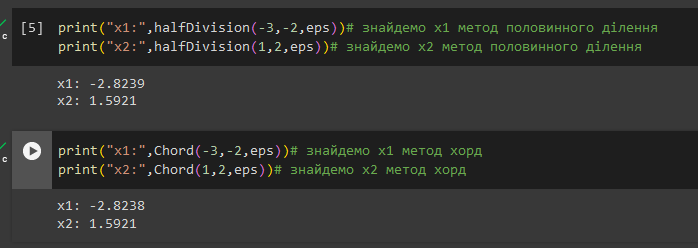